<a href="https://colab.research.google.com/github/riminator/RobotLearning/blob/main/Github_Supervised_Learning_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# 1. 1D tensor
tensor_1d = torch.tensor([1, 2, 3, 4, 5])
print("1D Tensor:", tensor_1d)
print("Shape:", tensor_1d.shape)

# 2. 2x3 tensor of zeros
tensor_zeros = torch.zeros(2, 3)
print("\nZeros Tensor:")
print(tensor_zeros)
print("Shape:", tensor_zeros.shape)

# 3. 3x3 random tensor (normal distribution)
tensor_random = torch.randn(3, 3)
print("\nRandom Tensor:")
print(tensor_random)
print("Shape:", tensor_random.shape)

1D Tensor: tensor([1, 2, 3, 4, 5])
Shape: torch.Size([5])

Zeros Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape: torch.Size([2, 3])

Random Tensor:
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617]])
Shape: torch.Size([3, 3])


In [ ]:
a = torch.tensor([[1., 2.], [3., 4.]])
b = torch.tensor([[5., 6.], [7., 8.]])

# 1. Element-wise addition
addition = a + b  # or torch.add(a, b)
print("Element-wise addition:")
print(addition)

# 2. Matrix multiplication
matmul = torch.matmul(a, b)  # or a @ b
print("\nMatrix multiplication:")
print(matmul)

# 3. Mean of tensor a
mean_a = a.mean()  # or torch.mean(a)
print("\nMean of a:", mean_a.item())

Element-wise addition:
tensor([[ 6.,  8.],
        [10., 12.]])

Matrix multiplication:
tensor([[19., 22.],
        [43., 50.]])

Mean of a: 2.5


In [ ]:
# Create tensor with gradient tracking
x = torch.tensor(3.0, requires_grad=True)

# Compute y = x^2 + 2x + 1
y = x**2 + 2*x + 1

# Compute gradient (backpropagation)
y.backward()

# dy/dx = 2x + 2, at x=3: dy/dx = 8
print(f"x = {x.item()}")
print(f"y = x² + 2x + 1 = {y.item()}")
print(f"dy/dx = {x.grad.item()}")
print(f"\nExpected: dy/dx = 2x + 2 = 2(3) + 2 = 8 ✓")

x = 3.0
y = x² + 2x + 1 = 16.0
dy/dx = 8.0

Expected: dy/dx = 2x + 2 = 2(3) + 2 = 8 ✓


In [ ]:
# Number of samples
n_samples = 1000

# Generate X values uniformly between -2 and 2
X = np.random.uniform(-2, 2, (n_samples, 1))

# Generate y values with noise
noise = np.random.normal(0, 0.5, (n_samples, 1))
y = 3 * X**2 - 2 * X + 1 + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")

X shape: (1000, 1)
y shape: (1000, 1)
X range: [-1.98, 2.00]
y range: [-0.38, 17.43]


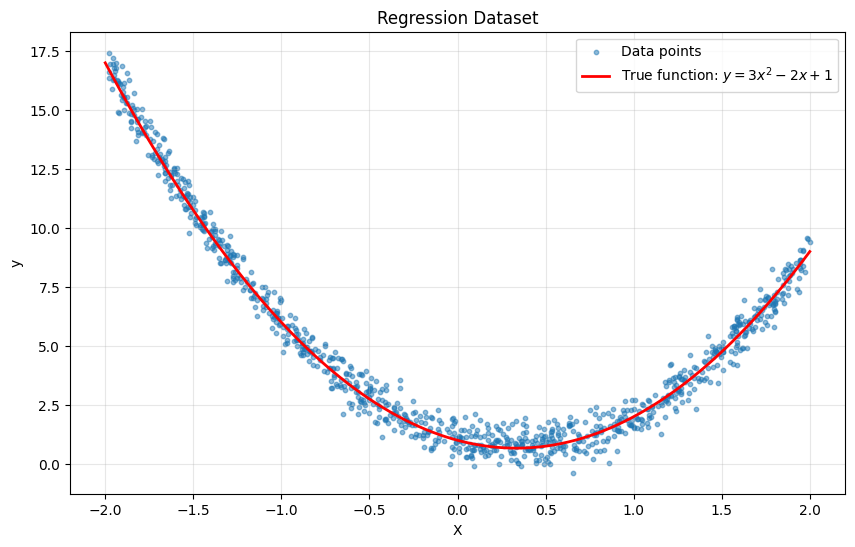

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, s=10, label='Data points')

# Plot the true function (without noise)
X_line = np.linspace(-2, 2, 100).reshape(-1, 1)
y_true = 3 * X_line**2 - 2 * X_line + 1
plt.plot(X_line, y_true, 'r-', linewidth=2, label='True function: $y = 3x^2 - 2x + 1$')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.FloatTensor(y_train).to(device)
X_test_tensor = torch.FloatTensor(X_test).to(device)
y_test_tensor = torch.FloatTensor(y_test).to(device)

print(f"Training set: {X_train_tensor.shape[0]} samples")
print(f"Test set: {X_test_tensor.shape[0]} samples")
print(f"Tensor device: {X_train_tensor.device}")

Training set: 800 samples
Test set: 200 samples
Tensor device: cpu


In [ ]:
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(1, 32)    # Input to hidden layer 1
        self.fc2 = nn.Linear(32, 16)   # Hidden layer 1 to hidden layer 2
        self.fc3 = nn.Linear(16, 1)    # Hidden layer 2 to output

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))     # First hidden layer
        x = self.relu(self.fc2(x))     # Second hidden layer
        x = self.fc3(x)                # Output layer (no activation for regression)
        return x

# Create the model
model = RegressionNet().to(device)
print(model)

RegressionNet(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params}")

# Breakdown
print("\nParameter breakdown:")
for name, param in model.named_parameters():
    print(f"  {name}: {param.numel()} parameters (shape: {list(param.shape)})")

Total trainable parameters: 609

Parameter breakdown:
  fc1.weight: 32 parameters (shape: [32, 1])
  fc1.bias: 32 parameters (shape: [32])
  fc2.weight: 512 parameters (shape: [16, 32])
  fc2.bias: 16 parameters (shape: [16])
  fc3.weight: 16 parameters (shape: [1, 16])
  fc3.bias: 1 parameters (shape: [1])


In [ ]:
# Loss function
criterion = nn.MSELoss()

# Optimizer
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Loss function: {criterion}")
print(f"Optimizer: Adam with lr={learning_rate}")

Loss function: MSELoss()
Optimizer: Adam with lr=0.01


In [ ]:
# Training parameters
num_epochs = 500
train_losses = []
test_losses = []

print("Training started...")
print("-" * 50)

for epoch in range(num_epochs):
    # Set model to training mode
    model.train()

    # 1. Forward pass
    y_pred = model(X_train_tensor)

    # 2. Compute loss
    train_loss = criterion(y_pred, y_train_tensor)

    # 3. Backward pass (compute gradients)
    optimizer.zero_grad()  # Reset gradients to zero
    train_loss.backward()  # Compute gradients

    # 4. Update weights
    optimizer.step()

    # Record training loss
    train_losses.append(train_loss.item())

    # Evaluate on test set (no gradient computation needed)
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
        test_losses.append(test_loss.item())

    # Print progress every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {train_loss.item():.4f} | Test Loss: {test_loss.item():.4f}")

print("-" * 50)
print("Training completed!")

Training started...
--------------------------------------------------
Epoch [50/500] | Train Loss: 3.6560 | Test Loss: 4.1299
Epoch [100/500] | Train Loss: 0.7581 | Test Loss: 0.8194
Epoch [150/500] | Train Loss: 0.4137 | Test Loss: 0.4000
Epoch [200/500] | Train Loss: 0.3269 | Test Loss: 0.2989
Epoch [250/500] | Train Loss: 0.2918 | Test Loss: 0.2619
Epoch [300/500] | Train Loss: 0.2740 | Test Loss: 0.2435
Epoch [350/500] | Train Loss: 0.2638 | Test Loss: 0.2320
Epoch [400/500] | Train Loss: 0.2586 | Test Loss: 0.2263
Epoch [450/500] | Train Loss: 0.2558 | Test Loss: 0.2240
Epoch [500/500] | Train Loss: 0.2538 | Test Loss: 0.2225
--------------------------------------------------
Training completed!


### Exercise 4.3: Visualize the Loss Curve

Plot the training and test loss over epochs to see how the model learns.

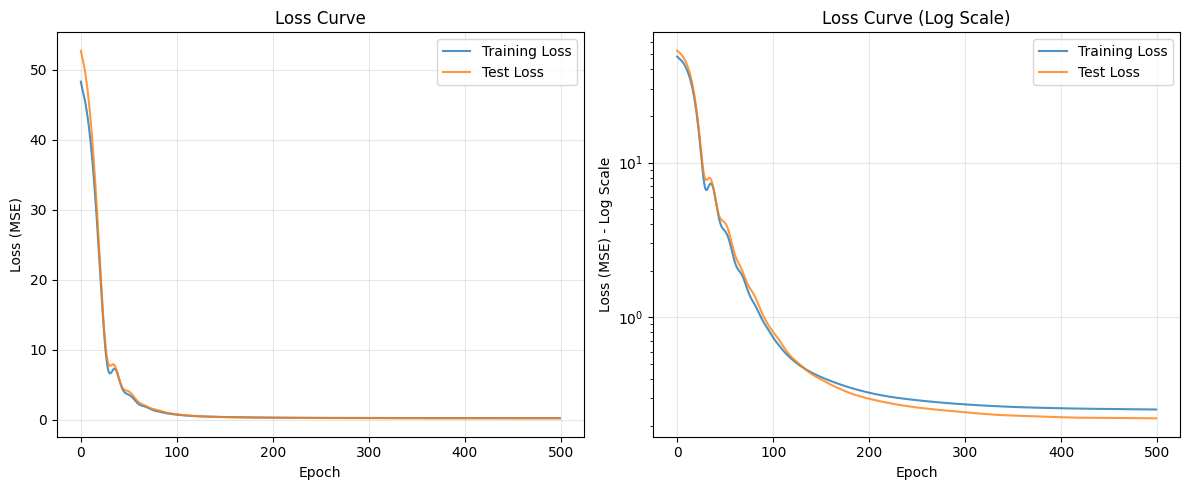


Final Training Loss: 0.2538
Final Test Loss: 0.2225


In [ ]:
plt.figure(figsize=(12, 5))

# Plot 1: Full loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', alpha=0.8)
plt.plot(test_losses, label='Test Loss', alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Log scale for better visualization
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss', alpha=0.8)
plt.plot(test_losses, label='Test Loss', alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE) - Log Scale')
plt.title('Loss Curve (Log Scale)')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Training Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")

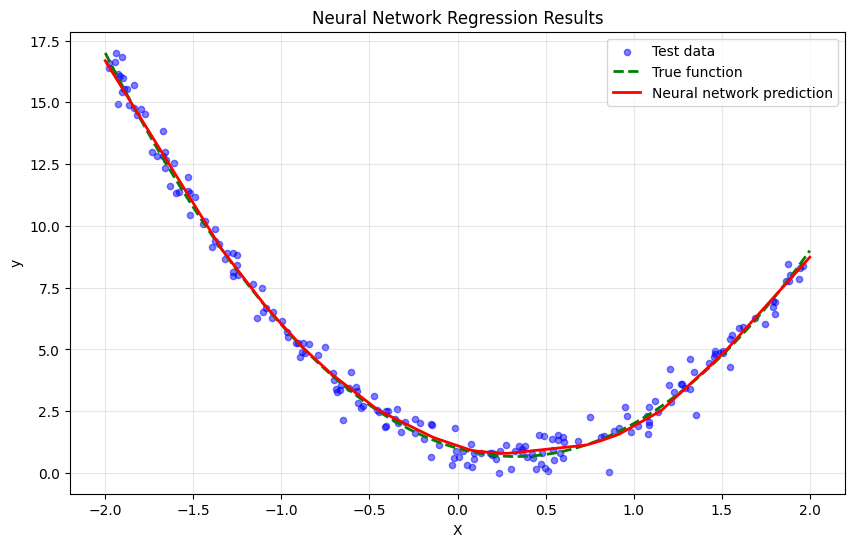

In [ ]:
# Generate predictions for visualization
model.eval()
with torch.no_grad():
    X_vis = torch.linspace(-2, 2, 200).reshape(-1, 1).to(device)
    y_pred_vis = model(X_vis).cpu().numpy()
    X_vis_np = X_vis.cpu().numpy()

# True function
y_true_vis = 3 * X_vis_np**2 - 2 * X_vis_np + 1

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, s=20, label='Test data', color='blue')
plt.plot(X_vis_np, y_true_vis, 'g--', linewidth=2, label='True function')
plt.plot(X_vis_np, y_pred_vis, 'r-', linewidth=2, label='Neural network prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

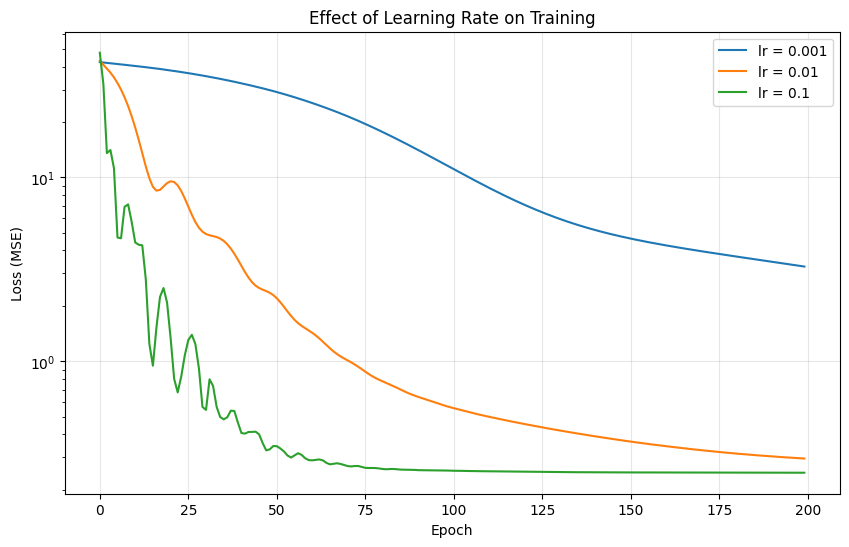

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
all_losses = {}

for lr in learning_rates:
    # Create new model
    model_exp = RegressionNet().to(device)
    optimizer_exp = optim.Adam(model_exp.parameters(), lr=lr)

    losses = []
    for epoch in range(200):
        model_exp.train()
        y_pred = model_exp(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)

        optimizer_exp.zero_grad()
        loss.backward()
        optimizer_exp.step()

        losses.append(loss.item())

    all_losses[lr] = losses

# Plot comparison
plt.figure(figsize=(10, 6))
for lr, losses in all_losses.items():
    plt.plot(losses, label=f'lr = {lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Effect of Learning Rate on Training')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

Shallow (1 hidden): Final loss = 0.3278, Parameters = 97
Deep (3 hidden): Final loss = 0.2517, Parameters = 1665


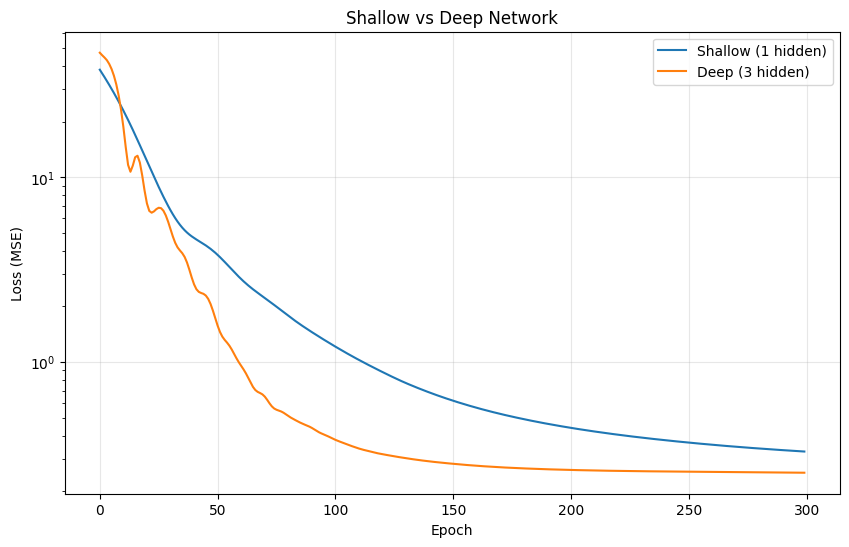

In [ ]:
class ShallowNet(nn.Module):
    def __init__(self):
        super(ShallowNet, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Train both models
models_to_compare = {
    'Shallow (1 hidden)': ShallowNet().to(device),
    'Deep (3 hidden)': DeepNet().to(device)
}

comparison_losses = {}

for name, model_exp in models_to_compare.items():
    optimizer_exp = optim.Adam(model_exp.parameters(), lr=0.01)

    losses = []
    for epoch in range(300):
        model_exp.train()
        y_pred = model_exp(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)

        optimizer_exp.zero_grad()
        loss.backward()
        optimizer_exp.step()

        losses.append(loss.item())

    comparison_losses[name] = losses
    print(f"{name}: Final loss = {losses[-1]:.4f}, Parameters = {count_parameters(model_exp)}")

# Plot comparison
plt.figure(figsize=(10, 6))
for name, losses in comparison_losses.items():
    plt.plot(losses, label=name)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Shallow vs Deep Network')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()